# Linear Regression with scikit-learn

Does money make people happier? Version with data splitting.

## Data

### Import

In [7]:
import pandas as pd

# Load the data from GitHub
LINK = "https://raw.githubusercontent.com/kirenz/datasets/master/oecd_gdp.csv"
df = pd.read_csv(LINK)

In [8]:
df.head()

,Country,GDP per capita,Life satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


In [9]:
df.tail()

,Country,GDP per capita,Life satisfaction
24,Iceland,50854.583,7.5
25,Australia,50961.865,7.3
26,Ireland,51350.744,7.0
27,Denmark,52114.165,7.5
28,United States,55805.204,7.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            29 non-null     object 
 1   GDP per capita     29 non-null     float64
 2   Life satisfaction  29 non-null     float64
dtypes: float64(2), object(1)
memory usage: 824.0+ bytes


### Correct format

In [11]:
# Change column names 
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head()

,country,gdp_per_capita,life_satisfaction
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.894,4.9
3,Poland,12495.334,5.8
4,Slovak Republic,15991.736,6.1


### Exploration

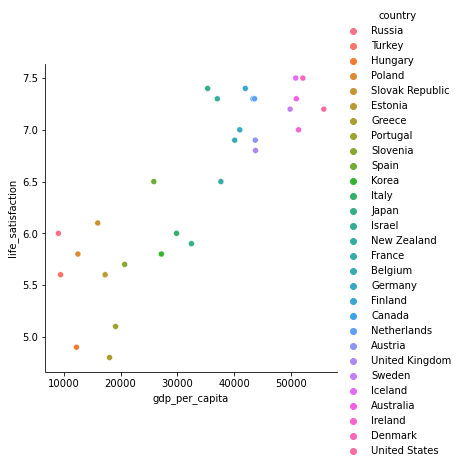

In [12]:
%matplotlib inline
import seaborn as sns

# Visualize the data
sns.relplot(x="gdp_per_capita", y='life_satisfaction', hue='country', data=df);

### Data split

In [13]:
# Select features for simple regression
X = df[['gdp_per_capita']]

# Create response
y = df["life_satisfaction"]

In [14]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

Simple linear regression

## Training

In [15]:
from sklearn.linear_model import LinearRegression

# Select a linear regression model
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

LinearRegression()

In [16]:
# Model coefficients
print('Coefficients: \n', "Intercept:", reg.intercept_, "\n Coefficient:", reg.coef_)

Coefficients: 
 Intercept: 4.867383809184242 
 Coefficient: [4.9184703e-05]


### Prediction

In [17]:
# Prediction
y_pred = reg.predict(X_test)

### Evaluation

In [18]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7578144582350161

In [19]:
# pretty output
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.76


In [20]:
from sklearn.metrics import mean_squared_error

# Mean squared error
mean_squared_error(y_test, y_pred)

0.09021411430745645

In [21]:
# Root mean squared error
mean_squared_error(y_test, y_pred, squared=False)

0.30035664518611277

### Use model

In [22]:
# Make a prediction for a new GDP value
X_new = pd.DataFrame({"gdp_per_capita": [50000]})

reg.predict(X_new)

array([7.32661896])

### Save and load model

In [25]:
from pathlib import Path

# show current working directory
Path.cwd()

PosixPath('/Users/jankirenz/books/regression/docs')

It is possible to save a model in scikit-learn by using joblib’s dump and load:

In [23]:
from joblib import dump, load

# store model in current working directory with Path()
dump(reg, Path('my_linear_model.joblib')) 

['my_linear_model.joblib']

In [27]:
# load model and save it as reg2 
reg2 = load(Path('my_linear_model.joblib')) 

In [28]:
# make a prediction
reg2.predict(X_new)

array([7.32661896])